# Deep Learning - 03 - (Lecture) Convolutional Neural Networks

### 1.My first CNN

* `input_shape` : size of your pictures and number of channels, usually 3 to start with (RGB)
* `kernel_size` : indicates how your want to perform your convolution at a given Convolutional Layer
* For every conv. layer, you need to specify the desired numbers of `filters` you want to create

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(50, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.Conv2D(30, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(20, kernel_size=3, activation='relu'))   # Note that kernel_size=3 corresponds to (3, 3)
model.add(layers.Conv2D(10, kernel_size=3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax')) 

model.summary()

## 2.Numbers of parameters

The number of parameters in a CNN depends on:
* the number of `filters` in a layer (and the number of `biases`)
* the size of each `kernel`

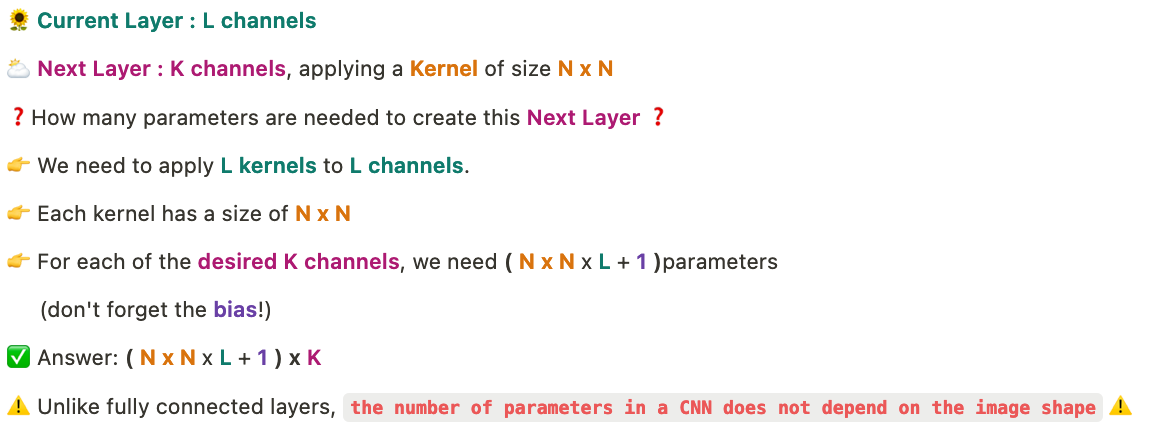

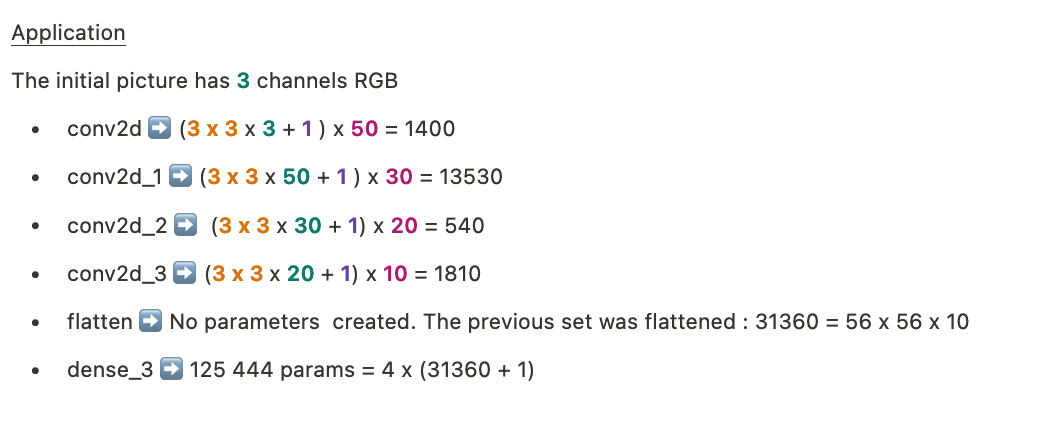

## 3.Hyperparameters of a CNN

### 3.1.Strides

* `Strides` : movements of your kernel during the convolution operation

In [ ]:
# Example 1
model = models.Sequential()
model.add(layers.Conv2D(16, (2,2), strides=(1,1), input_shape=(256, 256, 3)))
model.summary()

In [ ]:
# Example 2          
model = models.Sequential()
model.add(layers.Conv2D(16, (2,2), strides=(2,2), input_shape=(256, 256, 3)))
model.summary()

### 3.2.Padding

❌ No padding

In [ ]:
# Example 1
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), strides=(1,1), input_shape=(256, 256, 3),padding='valid'))
model.summary()

❇️ Padding

In [ ]:
# Example 2
model = models.Sequential()
model.add(layers.Conv2D(16, (2,2), strides=(1,1), input_shape=(256, 256, 3),padding='same'))
model.summary()

## 4.Output shape of a convolution

The output shape of a convolution depends on :
* `input_shape`
* `kernel_size`
* `padding`
* `strides`

## 5.Pooling Layers - Dimensionality Reduction

👉 `After a convolution`, practice has shown that it is interesting to `reduce the size of the output` <br/>
👉 This is called a `pooling` operation

### 5.1.`MaxPooling`

It `selects the maximum intensity value of the pixel with a given subpart of the image` <br/>(it is similar to a kernel, but it is not a convolution operation, just the max of the pixel values)

In [ ]:
# Max Pooling
model.add(layers.MaxPooling2D(pool_size=(2,2)))

### 5.2.`AveragePooling`

It `averages the pixel values in a subpart of the image`

In [ ]:
# Average Pooling 
model.add(layers.AveragePooling2D(pool_size=(2, 2)))

### 5.3.Consequences on the output shape of a convolution

❗ Remark ❗ Similarly to convolution operations, there are associated notions of `"kernel" size`, `strides` and `padding`.

In [ ]:
# NUMBER OF PARAMETRES 1ST CONV LAYER
((4*4)*1+1)*16

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.Conv2D(16, kernel_size = (4,4), strides=(2,2), input_shape=(28, 28, 1), padding='same'))
model.add(layers.MaxPool2D(pool_size=(3,3)))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))


model.summary()

* <u>original picture shape</u> : 28 height x 28 width x 1 channel (black or white)
* <u>conv2d_30</u> : 16 channels created, kernel moving by a stride 2 x 2, hence the shape 14 height x 14 width x 16 channels
* <u>max_pooling2d_6</u>: pooling_size 4 x 4, if not specified,  strides for the pooling_layer are duplicated from the pooling_size i.e. 4 x 4, hence 14/4 = 3 (remainder 2), therefore we drastically reduced the output our previous convolutional layer, the size of the picture is shrinked but the number of channels hasn't changed

## 6.How to build a CNN in practice

### 6.1.Minimal Network

In [ ]:
# ——— CNN Version 1: Minimal Network

model = Sequential()

# A first convolution layer. Here, we choose (arbitrarily) 16 filters, whose kernels are of size 4 by 4 pixels
model.add(layers.Conv2D(16, (4,4), input_shape=(28, 28, 1)))

# The flattening, which allows to transform the complex tensor to a single vector
model.add(layers.Flatten())

# The last layer which is related to your task
model.add(layers.Dense(10, activation='softmax'))

model.summary()

# ––– It is important to understand that these three layers are somehow mandatory

### 6.2.Common tricks


In [ ]:
#——— CNN Version 2: Minimal Network + Common tricks

model = Sequential()

# Pooling the output of a convolution layer is very common and highly recommanded
model.add(layers.Conv2D(16, (4,4), input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2,2))) 

# It is common to have at least 2 or 3 layers, where the kernel size decreases and number of filters 
# increases (compared to the previous layers) => we will see the reason why in the exercises
model.add(layers.Conv2D(32, (3,3)))
model.add(layers.MaxPool2D(pool_size=(2,2))) 

model.add(layers.Flatten())

# Use a intermediate Dense layer to combine the outputs of your convolution layers
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

### 6.3.Adding hyperparameters

In [ ]:
# ——— CNN Version 3: Minimal Network + Common tricks + First hyperparameters tests

model = Sequential()

# First convolution & max-pooling
model.add(layers.Conv2D(16, (4,4), strides=(2,2), input_shape=(28, 28, 1), padding='same'))
model.add(layers.MaxPool2D(pool_size=(3,3)))

# Second convolution & max-pooling
model.add(layers.Conv2D(32, (3,3), strides=(2,2), padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

# ––– This is where your Data Scientist skills begin

## 7.Mnist Example

In [2]:
# ——— CNN Version 3: Minimal Network + Common tricks + First hyperparameters tests
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# ——— CNN Version 1: Minimal Network
model = Sequential()
model.add(layers.Conv2D(16, (4,4), input_shape=(28, 28, 1), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
# ––– This is where your Data Scientist skills begin

In [3]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.
X_test = X_test / 255.

from tensorflow.keras.utils import to_categorical
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
history = model.fit(X_train, y_cat_train,
          validation_split = 0.2,
          epochs=2, 
          batch_size=32, 
          verbose=1)

# The early stopping criterion and validation set are not used just to clarify the example
# But don't forget it in practice

Epoch 1/2
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2031 - accuracy: 0.9402 - val_loss: 0.1011 - val_accuracy: 0.9702
Epoch 2/2
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0776 - accuracy: 0.9759 - val_loss: 0.0772 - val_accuracy: 0.9765


## 8.Evaluating a CNN model

In [7]:
## We now evaluate on the test data
print(model.evaluate(X_test, y_cat_test, verbose=0))

[0.06974700838327408, 0.9781000018119812]


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 16)        272       
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 10)                100010    
                                                                 
Total params: 100,282
Trainable params: 100,282
Non-trainable params: 0
_________________________________________________________________


**Warning** <br/>
Open Section 9 `after` having completed the `Transfer Learning` challenge

## 9.Transfer Learning

We have seen that the kernels are learning some patterns: 
* edges
* outlines
*shapes
*gradients
*... 
which seems to be independant from any task.

You can:
1. load the same CNN
2. remove the last layer
3. replace them by the one suited to your problem
4. then learn the weights of these last layers.

❗ Remark ❗ 
* Most classical architectures are available in keras, with pretrained weights. 
* This enables you to do transfer learning i.e. using the knowledge contained in the convolutions of the network to perform another task on the images

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
model.trainable = False

In [ ]:
flatten_layer = layers.Flatten()
dense_layer = layers.Dense(500, activation='relu')
prediction_layer = layers.Dense(3, activation='softmax')

In [ ]:
model = models.Sequential([
        model,
        flatten_layer,
        dense_layer,
        prediction_layer])

model.summary()